In [1]:
import ROOT

Welcome to JupyROOT 6.22/06


In [2]:
import os

In [3]:
import root_numpy as rnp

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
data_folder = "/Users/yw18581/UoB/CHANCE/test_50files/"

In [7]:
fname = os.path.join(data_folder, "Run_15000_to_15500_vertexed.root")

In [8]:
scattering_angle_x = rnp.root2array(fname, treename="T", 
                                   branches="fitscattering.scatteranglex")

In [9]:
scattering_angle_y = rnp.root2array(fname, treename="T", 
                                   branches="fitscattering.scatterangley")

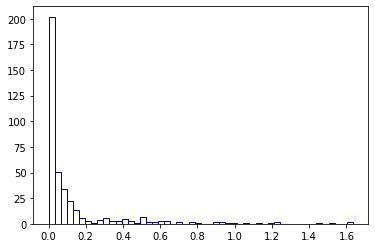

In [10]:
plt.hist(scattering_angle_x, bins=50, color='white', edgecolor='darkblue')
plt.show()

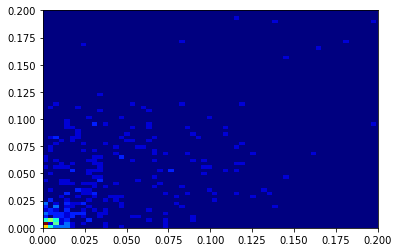

In [11]:
plt.hist2d(scattering_angle_x, scattering_angle_y, bins=500, cmap='jet')
plt.xlim(0, 0.20)
plt.ylim(0,0.20)
plt.show()

In [12]:
scatt3d = np.sqrt(scattering_angle_x**2+scattering_angle_y**2)

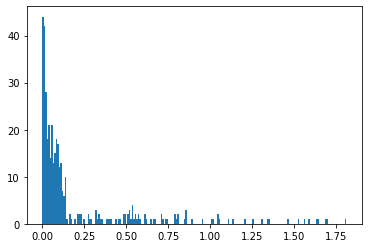

In [13]:
plt.hist(scatt3d, bins=200)
plt.show()

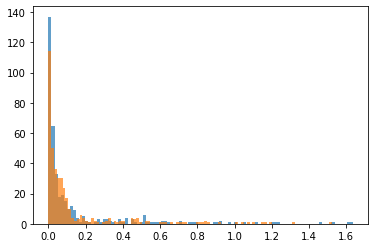

In [14]:
plt.hist(scattering_angle_x, bins=100, alpha=0.7)
plt.hist(scattering_angle_y, bins=100, alpha=0.7)
plt.show()

#### Tracks

In [15]:
tracks_x = rnp.root2array(fname, treename="T", branches="fitscattering.vx")
tracks_y = rnp.root2array(fname, treename="T", branches="fitscattering.vy")
tracks_z = rnp.root2array(fname, treename="T", branches="fitscattering.vz")

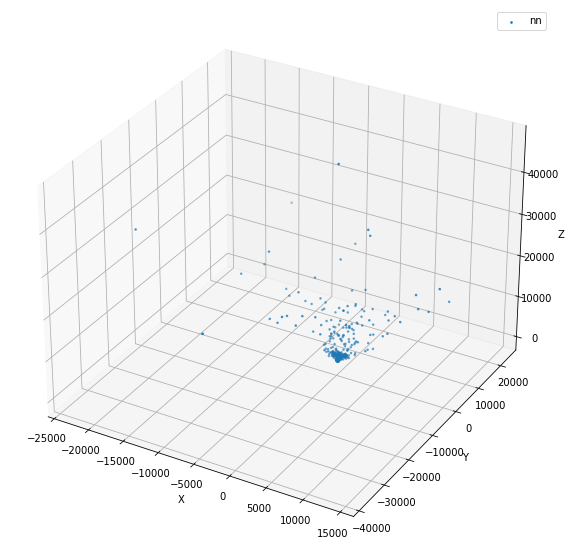

In [17]:
fig = plt.figure(figsize=(10,10))
colors =['red', 'blue', 'green','orange']
ax = fig.add_subplot(111,projection="3d")

ax.scatter(tracks_x, tracks_y, tracks_z,
               label='nn', s=2.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='upper right')
plt.show()

In [7]:
test_data = '../min2analyzer_nlayers_chance/test_saving_fit_hits.root'

In [13]:
fitparamsx = [rnp.root2array(test_data, treename='T', branches='xtrackpar{}'.format(i)) for i in [0,1]]

In [14]:
fitparamsy = [rnp.root2array(test_data, treename='T', branches='ytrackpar{}'.format(i)) for i in [0,1]]

In [15]:
x0, x1 = np.vstack(fitparamsx).transpose()[0]

In [16]:
xx = np.arange(0,200)
zz = np.arange(1000,2000)

In [17]:
def f(x):
    return x0 + x * x1

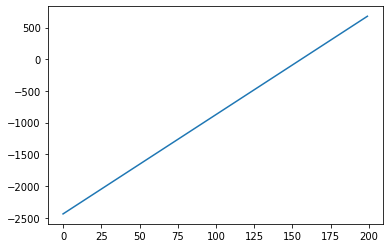

In [18]:
plt.plot(xx, f(xx))

In [31]:
pt = lambda x: - x[0]/x[1]

In [20]:
pt(np.vstack(fitparamsx).transpose()[-1])

100.99591309003836

In [21]:
pt(np.vstack(fitparamsy).transpose()[-1])

96.6266936895309

In [22]:
fitparamsy = np.vstack(fitparamsy).transpose()

In [23]:
fitparamsx = np.vstack(fitparamsx).transpose()

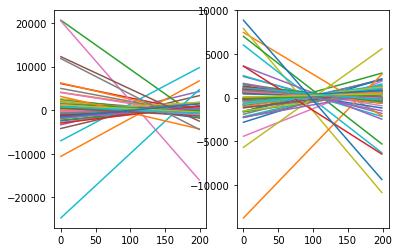

In [24]:
fig, ax = plt.subplots(1, 2)
for (x0, x1), (y0, y1) in zip(fitparamsx, fitparamsy):
    ax[0].plot(xx, (x0 + xx*x1))
    ax[1].plot(xx, (y0 + xx*y1))
plt.show()

In [11]:
evt_id = rnp.root2array(test_data, treename='T', branches='evt_id')

In [12]:
evt_id

array([  4309.,   4673.,   8890.,  11836.,  13201.,  13409.,  14314.,
        21409.,  30001.,  30602.,  37305.,  40427.,  40479.,  43350.,
        44604.,  50772.,  51220.,  53071.,  62667.,  63481.,  66909.,
        69560.,  69796.,  71458.,  71601.,  75332.,  77421.,  81675.,
        82504.,  85233.,  92779.,  93756.,  97746.,  97869.,  98170.,
       103852., 115668., 118063., 120980., 130203., 132944., 135651.,
       135858., 138433., 141328., 142008., 143082., 145287., 146768.,
       147361., 150499., 153273., 157909., 170144., 171469., 178989.,
       183521., 186228., 187025., 188680., 190824., 191530., 191658.,
       193442., 196047., 200631., 203083., 204221., 204331., 211029.,
       211740., 212363., 212837., 214834., 215230., 217524., 217920.,
       218694., 218809., 220348., 220681., 220893., 227879., 229144.,
       231468., 232776., 233538., 234267., 234873., 236240., 237142.])

In [36]:
pt(fitparamsx[np.where(evt_id==220681)[0]][0])

163.49806162624054

In [37]:
pt(fitparamsy[np.where(evt_id==220681)[0]][0])

22.87618358065874

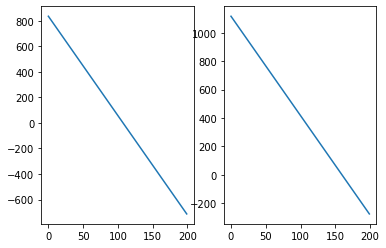

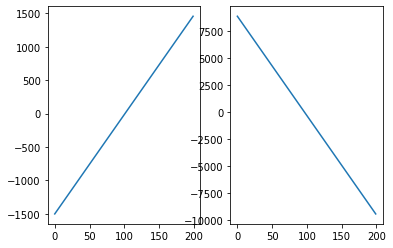

In [59]:
for i, ((x0, x1), (y0, y1)) in enumerate(zip(fitparamsx, fitparamsy)):
    if i >=89:
        fig, ax = plt.subplots(1, 2)
        ax[1].plot(xx, (y0 + xx*y1))
        ax[0].plot(xx, (x0 + xx*x1))
        plt.show()

In [38]:
fname_hit = os.path.join(data_folder, "Run_15000_to_15500_findhits.root")

In [41]:
ghs = [rnp.root2array(fname_hit, treename='T', branches='globalhits.globalhit{}'.format(i)) for i in range(8)]

In [42]:
ghs = np.vstack(ghs).transpose()

In [48]:
ghs[237142]

array([107.45   ,  93.10625,  37.85   ,  97.15625, 125.84375, 175.7    ,
       122.46875,  90.74375])

In [50]:
z0= 377.2
z1= 260.5
z2= 78.1
z3= 11.8
z4= 373.5
z5= 256.5
z6 = 74.1
z7 = 7.8
zs = [z0, z1, z2, z3, z4, z5, z6, z7]

In [60]:
xx = np.arange(200)

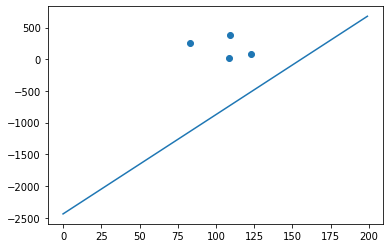

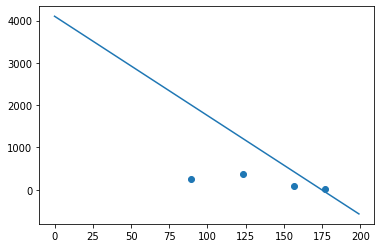

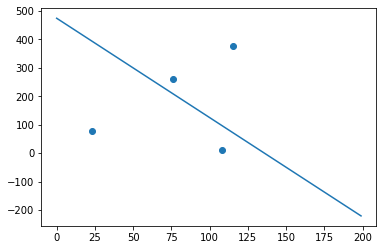

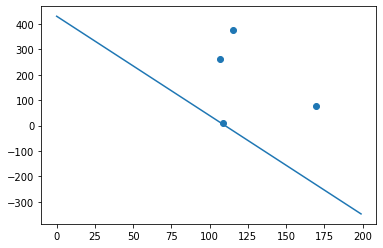

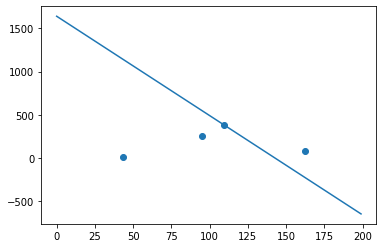

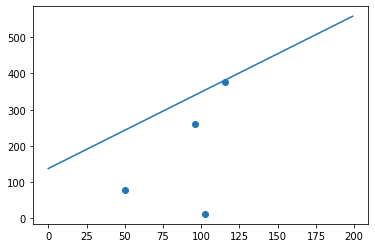

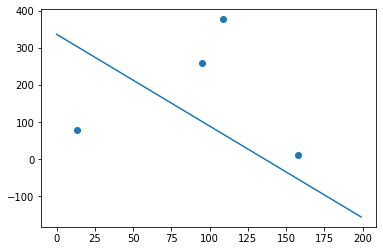

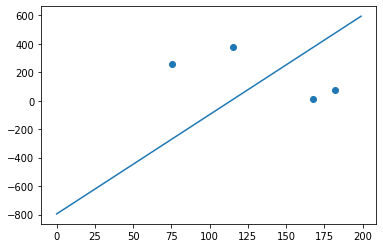

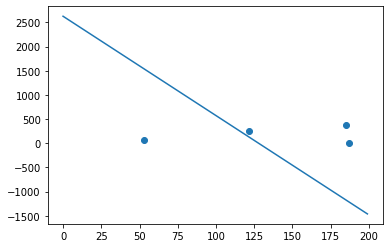

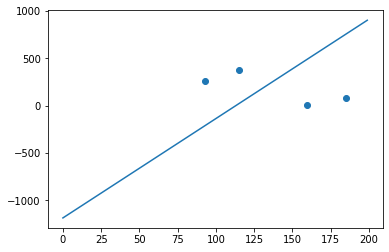

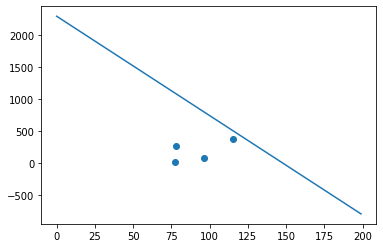

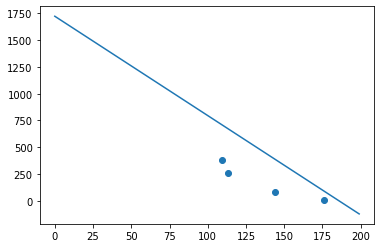

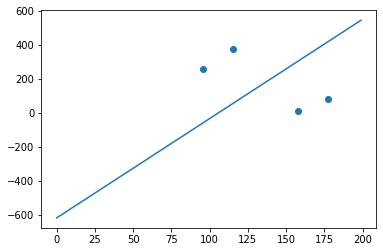

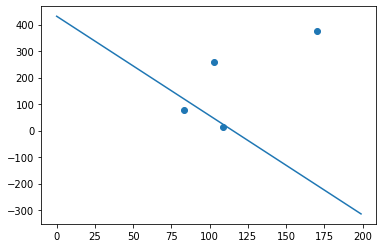

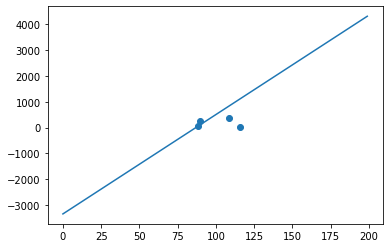

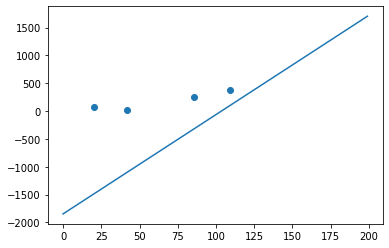

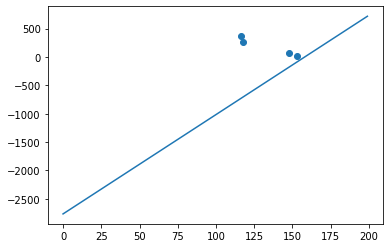

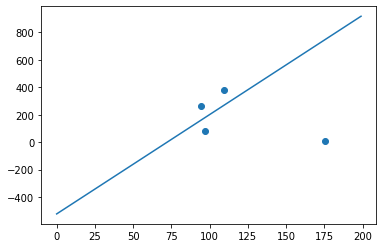

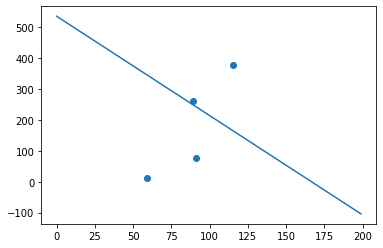

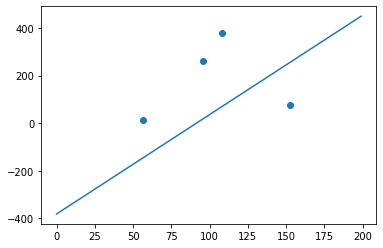

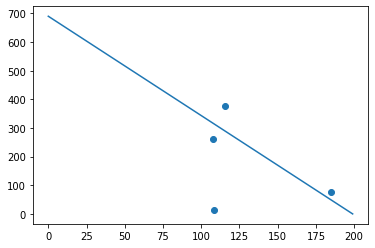

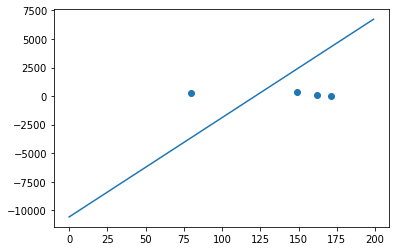

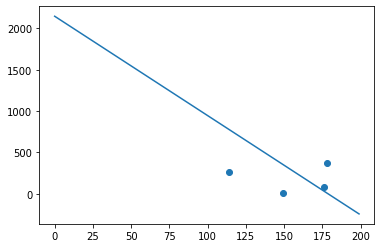

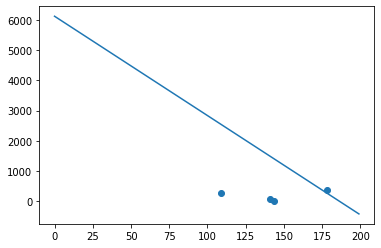

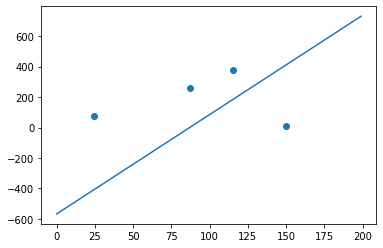

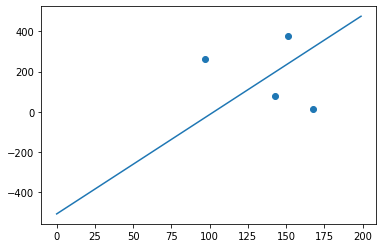

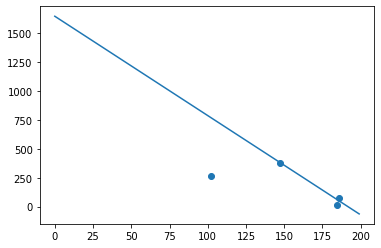

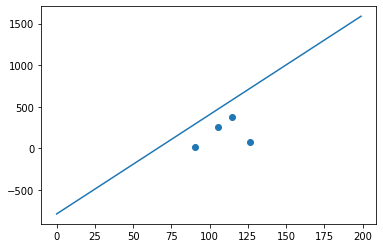

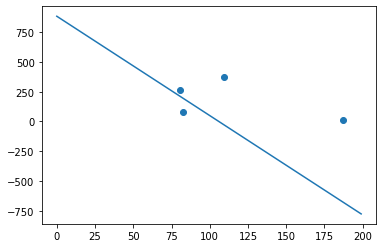

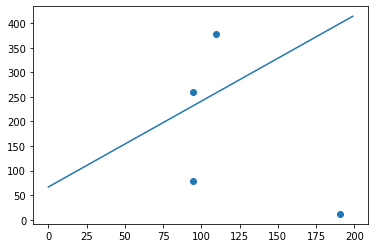

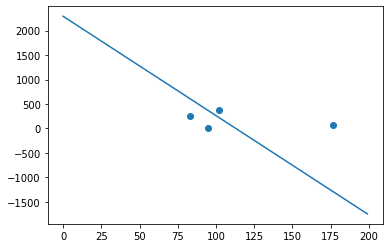

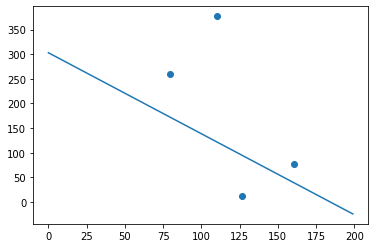

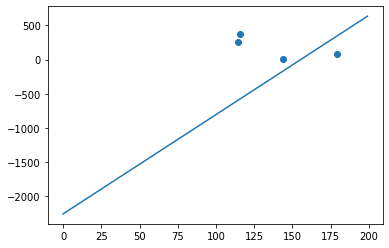

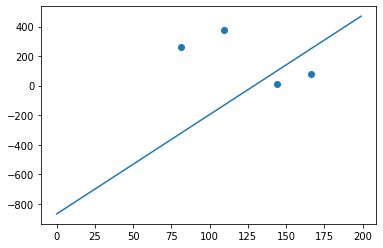

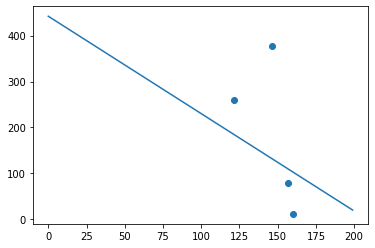

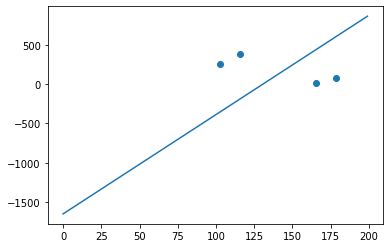

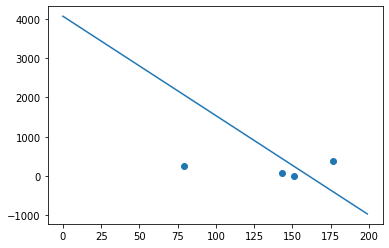

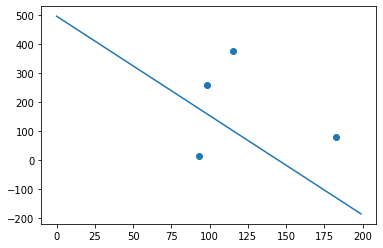

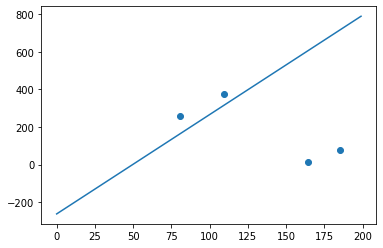

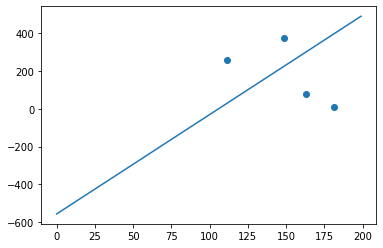

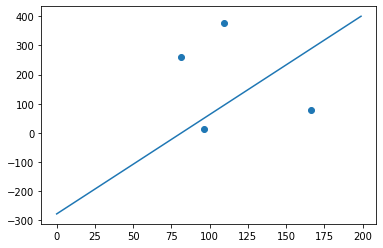

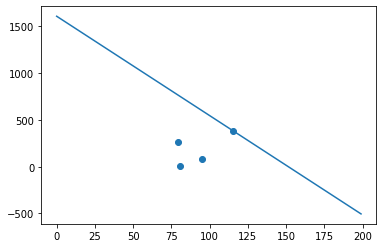

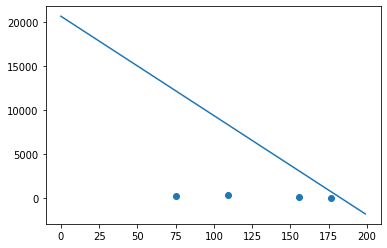

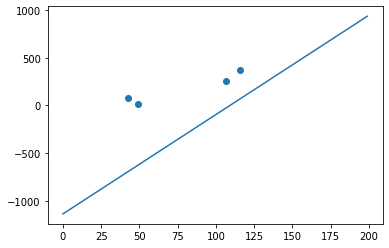

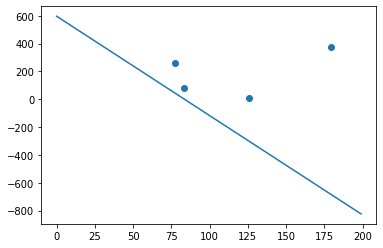

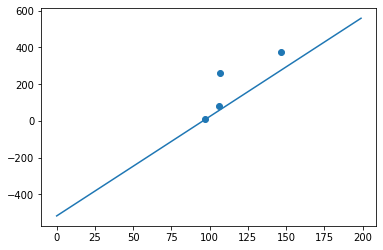

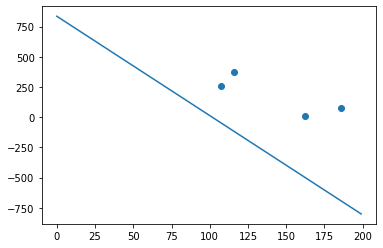

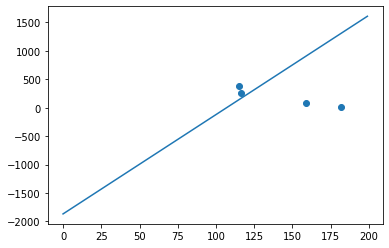

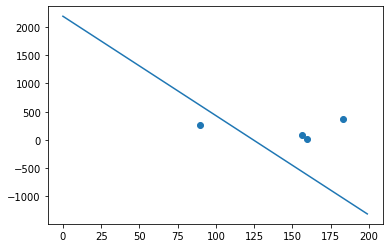

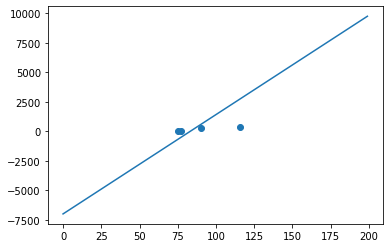

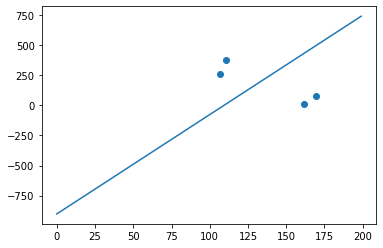

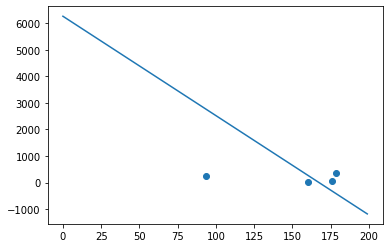

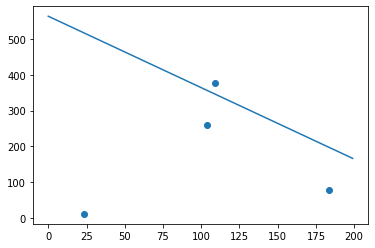

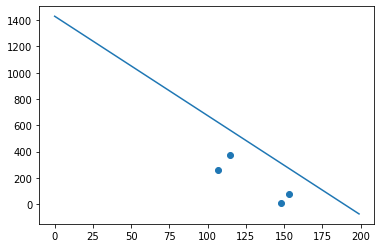

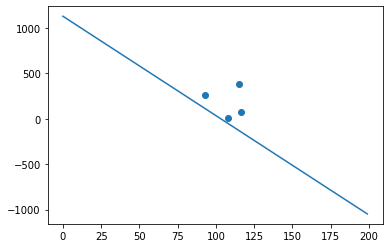

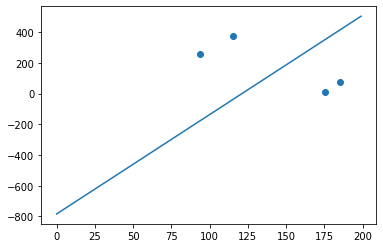

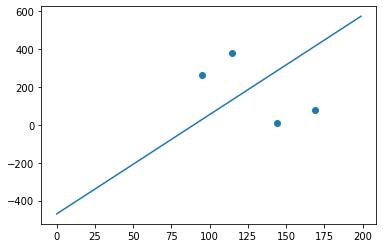

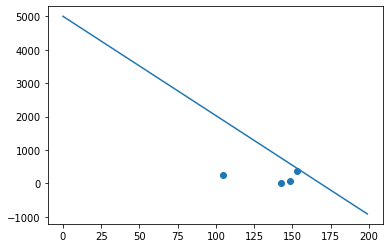

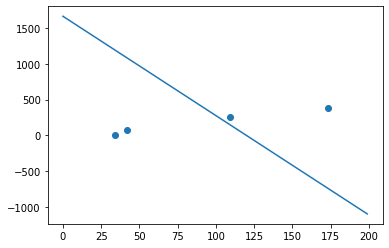

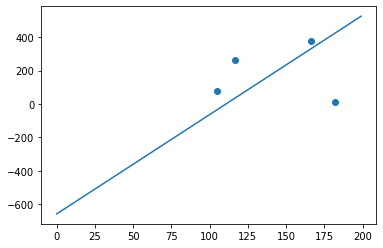

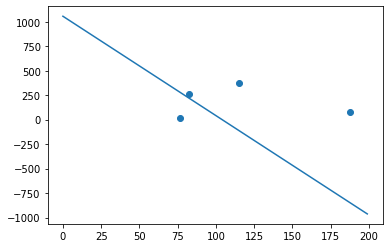

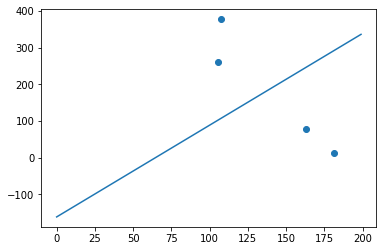

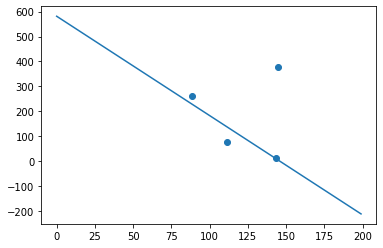

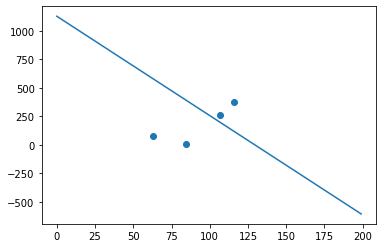

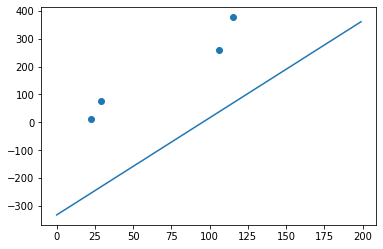

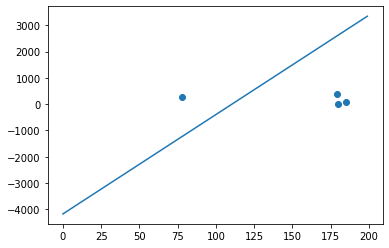

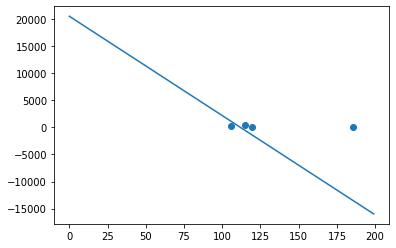

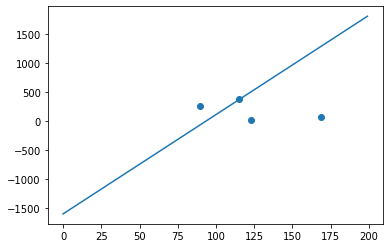

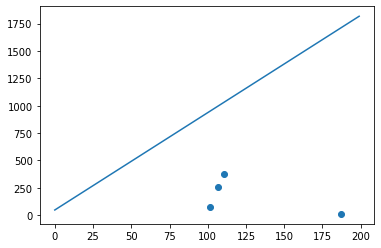

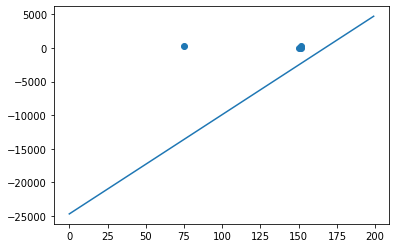

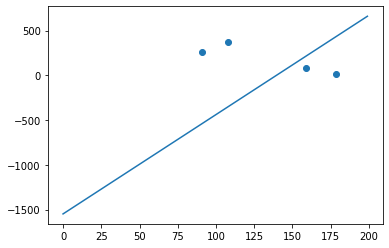

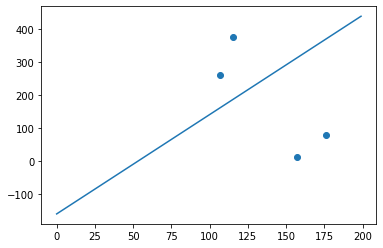

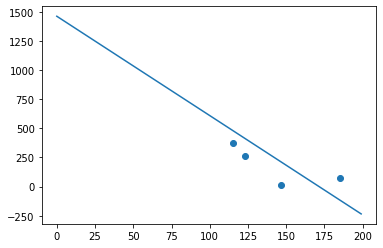

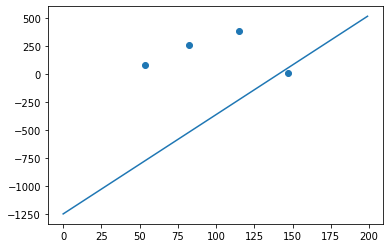

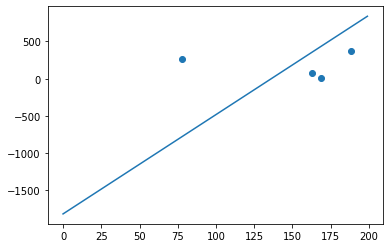

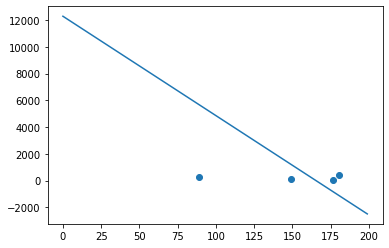

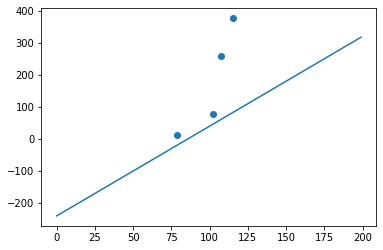

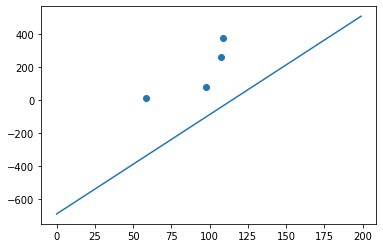

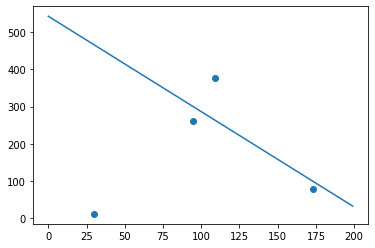

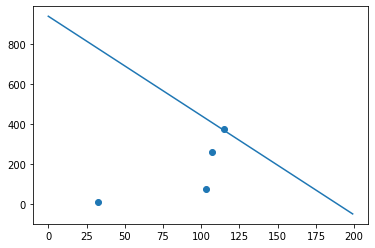

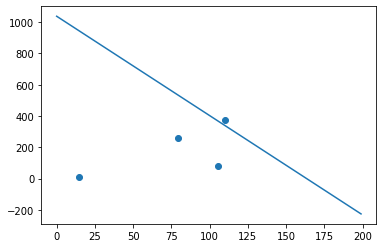

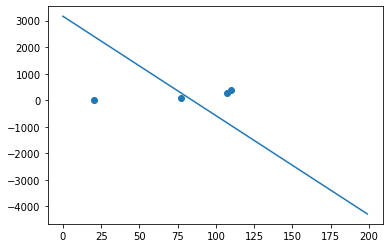

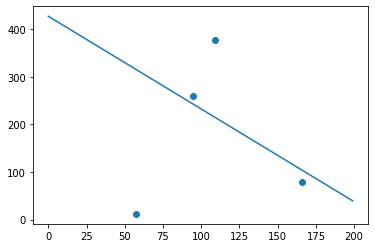

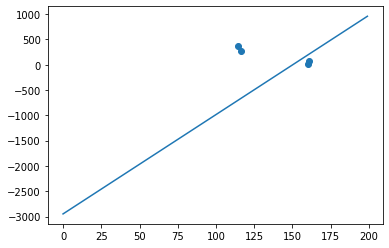

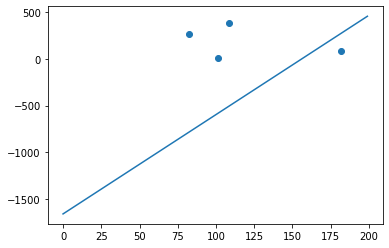

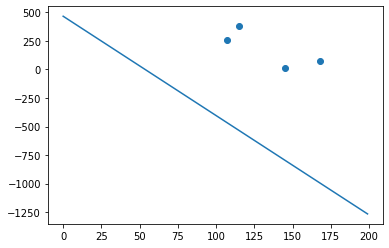

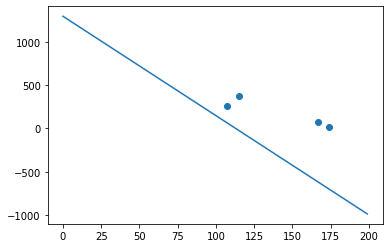

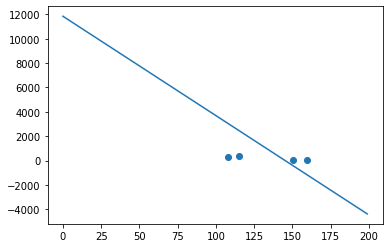

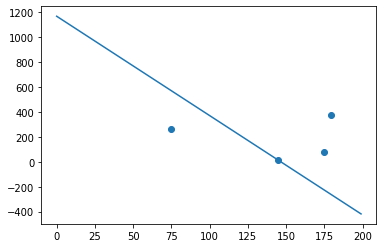

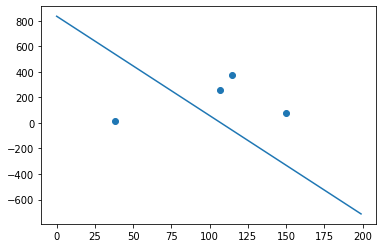

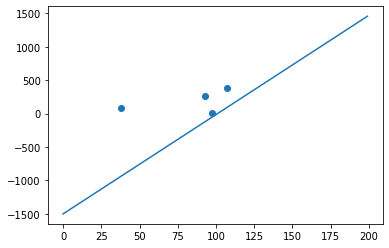

In [68]:
for e in evt_id:
    plt.scatter(ghs[int(e)][:4], zs[:4])
    plt.plot(fitparamsx[np.where(evt_id==e)[0]][0][0] + xx*fitparamsx[np.where(evt_id==e)[0]][0][1])
    plt.show()

In [58]:
fitparamsx[np.where(evt_id==237142)[0]][0]

array([-1501.64918992,    14.8684154 ])